<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA-SCIENCE-NA-PR-TICA/blob/master/Reclama%C3%A7%C3%B5es_Gov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploatória 

Este DataFrame faz uma análise dos dados extraídos do site xxx,....

In [1]:
#Importando as bibliotecas.
!pip install pandas -q  #atualização pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Verificação da versão do pandas que foi instalada.

In [3]:
pd.__version__

'1.0.3'

In [4]:
df = pd.read_csv("/content/drive/My Drive/DataFrames/2_semestre_2016.csv", sep=";", encoding="latin1")
df.head(10)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,NE,PI,São Raimundo Nonato,M,entre 21 a 30 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança após cancelamento do serviço,Loja física,S,S,Finalizada avaliada,Resolvida,4.0,1
1,CO,GO,Aparecida de Goiânia,F,entre 21 a 30 anos,30/07/2016,0.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Má qualidade no atendimento presencial ou outr...,Domicílio,S,S,Finalizada avaliada,Não Resolvida,5.0,1
2,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,31/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
4,SE,MG,Oliveira,F,até 20 anos,30/07/2016,1.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Demais aparelhos de comunicação,Cobrança / Contestação,Dificuldade na devolução de valores pagos / re...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,3.0,1
5,SE,SP,São Paulo,M,entre 41 a 50 anos,30/07/2016,1.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,1.0,1
6,N,AM,Manaus,M,mais de 70 anos,29/07/2016,0.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Vício de Qualidade,Funcionamento inadequado do serviço (má qualid...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,1
7,NE,SE,Estância,M,até 20 anos,29/07/2016,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Resolvida,5.0,1
8,SE,RJ,Magé,M,entre 31 a 40 anos,29/07/2016,0.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Cobrança / Contestação,Dificuldade na Renegociação / parcelamento de ...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,1
9,S,RS,Porto Alegre,M,entre 51 a 60 anos,29/07/2016,0.0,Azul Linhas Aéreas,Transporte Aéreo,Transportes,Aéreo,Cobrança / Contestação,Imposição de multa indevida / abusiva,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,1


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.describe()

,Tempo Resposta,Nota do Consumidor,Total
count,161993.000000,95118.000000,162584.0
mean,6.440247,3.320108,1.0
std,3.378037,1.696041,0.0
min,0.000000,1.000000,1.0
25%,3.000000,1.000000,1.0
50%,8.000000,4.000000,1.0
75%,9.000000,5.000000,1.0
max,12.000000,5.000000,1.0


##Número de Reclamações x Estado

UF
AC      554
AL      647
AM     1026
AP      173
BA     8269
CE     5362
DF     7057
ES     3612
GO     4355
MA     1572
MG    14356
MS     1548
MT     4108
PA     1721
PB     1586
PE     4192
PI      908
PR    15107
RJ    16895
RN     1238
RO      565
RR      220
RS    14615
SC     4898
SE      750
SP    44905
TO     2345
Name: UF, dtype: int64

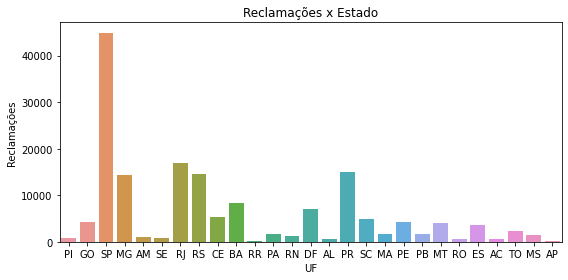

In [7]:
#Encontrar o número de reclamaçõesxEstado 
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(df["UF"], ax=ax)
ax.set_title("Reclamações x Estado")
ax.set_ylabel("Reclamações")
plt.tight_layout();

#Gráfico acima pode ser feito de outra forma
df.groupby("UF")["UF"].count()



##Número de Reclamações por Sexo

In [8]:
#Número de reclamações x Sexo.
df["Sexo"].value_counts()




M    95462
F    67122
Name: Sexo, dtype: int64

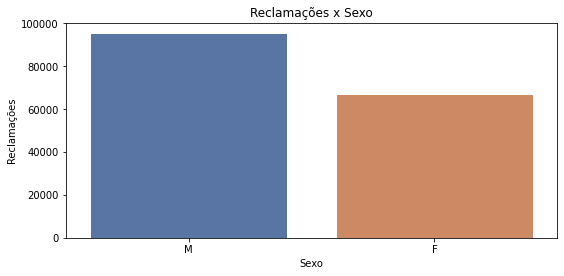

In [9]:
#Gráfico.
fig, ax = plt.subplots(figsize=(8,4))
sns.set(context="notebook", style="darkgrid", color_codes=True)
sns.countplot(df["Sexo"])
ax.set_title("Reclamações x Sexo")
ax.set_ylabel("Reclamações")
plt.tight_layout();

#Outra forma de plotar o gráfico.
#sexo = df["Sexo"].unique()
#count = df["Sexo"].value_counts()
#sns.barplot(x=sexo , y=count)
#plt.tight_layout();



##Faixa etária de consumidores por sexo.

In [10]:
df.groupby("Sexo")["Faixa Etária"].value_counts()

Sexo  Faixa Etária      
F     entre 21 a 30 anos    20470
      entre 31 a 40 anos    19617
      entre 41 a 50 anos    10626
      entre 51 a 60 anos     8306
      entre 61 a 70 anos     4242
      até 20 anos            1958
      mais de 70 anos        1903
M     entre 21 a 30 anos    33597
      entre 31 a 40 anos    31049
      entre 41 a 50 anos    13501
      entre 51 a 60 anos     8171
      entre 61 a 70 anos     4260
      até 20 anos            3170
      mais de 70 anos        1714
Name: Faixa Etária, dtype: int64

##Consumidores mais jovens contrataram o serviço pela intenet ?

In [11]:
#Averiguação das formas de contratação
df["Como Comprou Contratou"].unique()

array(['Loja física', 'Domicílio', 'Não comprei / contratei', 'Internet',
       'Telefone', 'SMS / Mensagem de texto', 'Stand, feiras e eventos',
       'Catálogo', 'Ganhei de presente'], dtype=object)

In [12]:
#Selecionando apenas quem comprou ou contratou pela intenet.
df2 = df[df["Como Comprou Contratou"] == "Internet"]
#Agrupando quem comprou ou contratou pela intenet com a respectiva Fáixa Etária.
df2.groupby("Faixa Etária")["Como Comprou Contratou"].value_counts()

Faixa Etária        Como Comprou Contratou
até 20 anos         Internet                   1729
entre 21 a 30 anos  Internet                  17255
entre 31 a 40 anos  Internet                  14514
entre 41 a 50 anos  Internet                   4913
entre 51 a 60 anos  Internet                   2481
entre 61 a 70 anos  Internet                   1025
mais de 70 anos     Internet                    297
Name: Como Comprou Contratou, dtype: int64

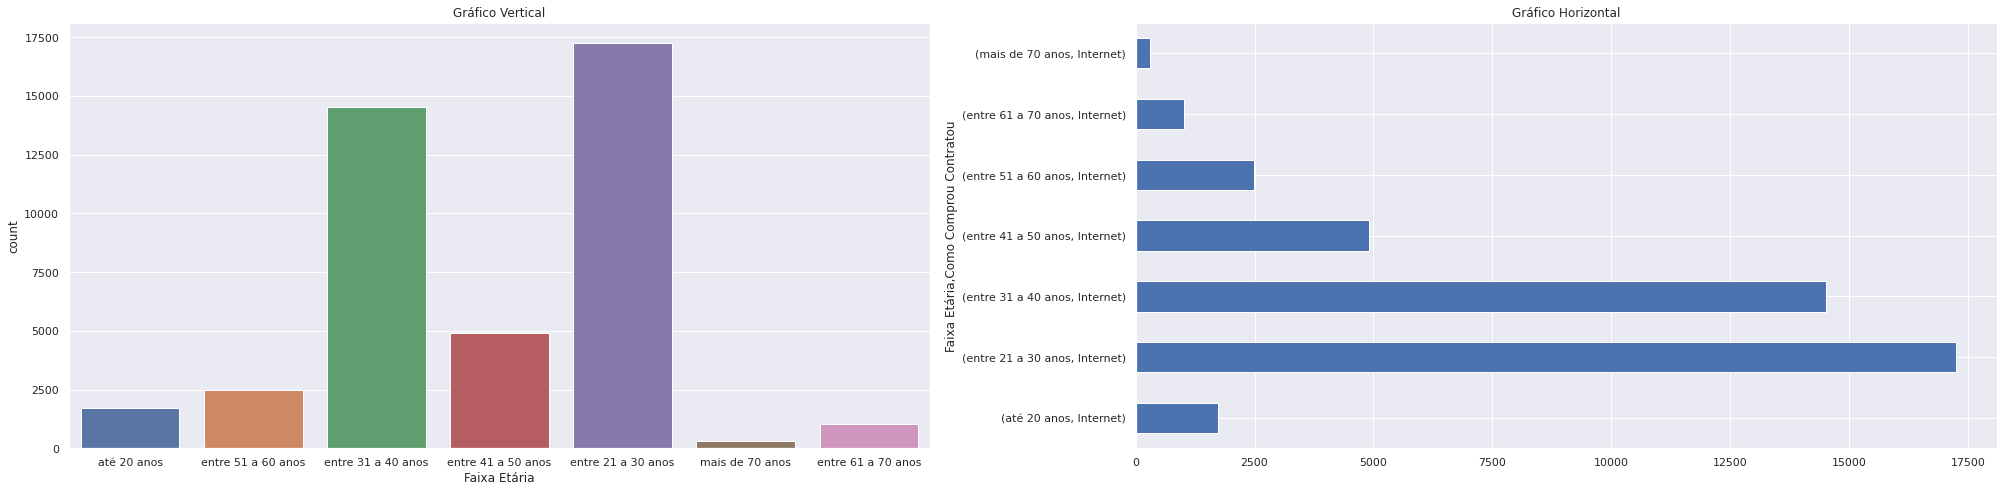

In [13]:
#Gráfico
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(28,7))
     
sns.countplot(df2["Faixa Etária"], ax=ax1)
df2.groupby("Faixa Etária")["Como Comprou Contratou"].value_counts().plot.barh(ax = ax2)
ax1.set_title("Gráfico Vertical")
ax2.set_title("Gráfico Horizontal")
plt.tight_layout();

##Estes consumidores procuram a empresa antes de registrar alguma reclamação ?

In [0]:
df3 = df[df["Faixa Etária"] == "entre 21 a 30 anos"].count()

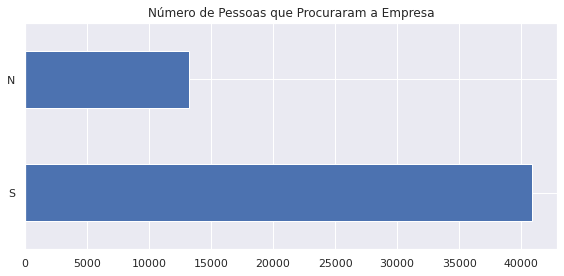

In [24]:
#Gráfico do Número de pessoas que procuraram a empresa.
df3 = df[df["Faixa Etária"] == "entre 21 a 30 anos"]

fig, ax = plt.subplots(figsize=(8,4))
df3["Procurou Empresa"].value_counts().plot.barh()
ax.set_title("Número de Pessoas que Procuraram a Empresa")
plt.tight_layout()